In [1]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [2]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Naive Bayesian Classifier Model

Building tree:   0%|          | 0/136.0 [00:00<?, ?it/s]

Building tree: 100%|██████████| 136/136.0 [00:00<00:00, 800.75it/s]


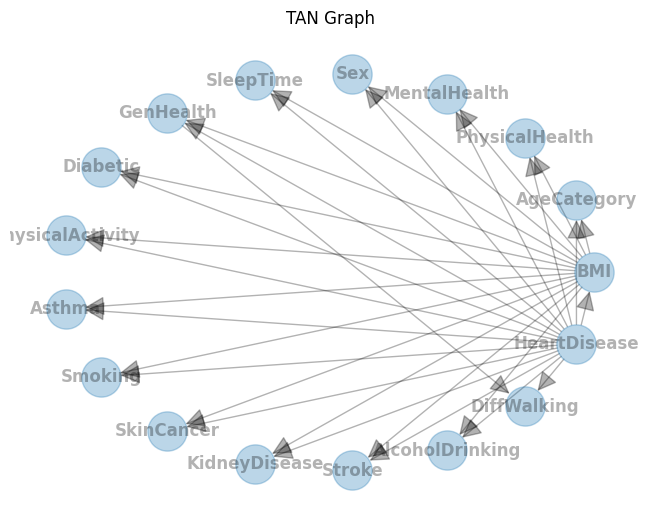

100%|██████████| 10063/10063 [05:36<00:00, 29.91it/s]


       HeartDisease
0                 0
1                 1
2                 1
3                 0
4                 0
...             ...
10089             1
10090             1
10091             0
10092             0
10093             1

[10094 rows x 1 columns]


KeyError: 'HeartDisease'

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import NaiveBayes, BayesianNetwork
from pgmpy.estimators import TreeSearch, BayesianEstimator
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix


features = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth',
            'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth',
            'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

target_variable = 'HeartDisease'

# Create a directed graph for Naive Bayes
nb_model = NaiveBayes()

# Add edges from each feature to the target variable
for feature in features:
    nb_model.add_edge(target_variable, feature)

# Use TreeSearch to learn the TAN structure
est = TreeSearch(df, root_node="BMI")
tan_dag = est.estimate(estimator_type="tan", class_node=target_variable)

# Draw the TAN graph
pos_tan = nx.circular_layout(tan_dag)
nx.draw(tan_dag, pos_tan, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold")
plt.title("TAN Graph")
plt.show()

model = BayesianNetwork(tan_dag.edges())
model.fit(
    df, estimator=BayesianEstimator, prior_type="dirichlet", pseudo_counts=0.1
)
# Predict on the test set
y_pred = model.predict(x_test)

cpds = model.get_cpds()

[[4.44275709e-05 3.81658995e-06]
 [4.03887009e-06 4.19824895e-05]
 [4.03887009e-06 4.19824895e-05]
 ...
 [4.44275709e-05 3.81658995e-06]
 [4.44275709e-05 3.81658995e-06]
 [4.44275709e-05 3.81658995e-06]]
[[[0.04347826 0.07692308]
  [0.07692308 0.04347826]
  [0.07692308 0.04347826]
  ...
  [0.04347826 0.07692308]
  [0.04347826 0.07692308]
  [0.04347826 0.07692308]]

 [[0.04347826 0.07692308]
  [0.07692308 0.04347826]
  [0.07692308 0.04347826]
  ...
  [0.04347826 0.07692308]
  [0.04347826 0.07692308]
  [0.04347826 0.07692308]]

 [[0.04347826 0.07692308]
  [0.07692308 0.04347826]
  [0.07692308 0.04347826]
  ...
  [0.04347826 0.07692308]
  [0.47826087 0.07692308]
  [0.04347826 0.07692308]]

 ...

 [[0.04347826 0.07692308]
  [0.07692308 0.04347826]
  [0.07692308 0.04347826]
  ...
  [0.04347826 0.07692308]
  [0.04347826 0.07692308]
  [0.04347826 0.07692308]]

 [[0.47826087 0.07692308]
  [0.07692308 0.04347826]
  [0.07692308 0.04347826]
  ...
  [0.04347826 0.07692308]
  [0.04347826 0.07692308

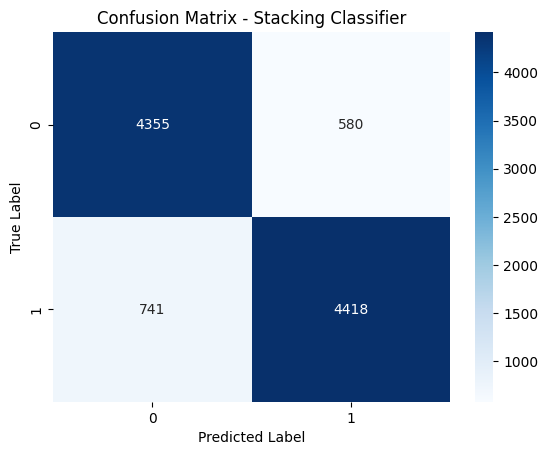

In [14]:
import seaborn as sns

for cpd in cpds:
    cpd_values = cpd.values
    print(cpd_values)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("\nAccuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()
